In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [2]:
from math import log10
def eng_str(x, u=0, n=1):
    """Print formatted value and its uncertainty in engineering format"""
    y = abs(x)
    exponent = int(log10(y))
    engr_exponent = exponent - exponent%3
    z = y/10**engr_exponent
    sign = '-' if x < 0 else ''
    fmt = "{z:.%df}" % (n)
    xStr = sign+fmt.format(z=z)
    
    # uncertainty
    yU = abs(u)
    zU = yU/10**engr_exponent
    fmtU = "{zU:.%df}" % (n)
    if engr_exponent != 0:
        uStr = " ± "+fmtU.format(zU=zU)+'e'+str(engr_exponent)
    else:
        uStr = " ± "+fmtU.format(zU=zU)
    return xStr + uStr

print(eng_str(123456, 3456, n=1))

123.5 ± 3.5e3


In [5]:
files = glob("../Data/*.csv")
files.sort()
for (i,f) in enumerate(files):
    print(f"{i}: {f}")
iFile = int(input("Enter file number: "))
dataFile = files[iFile]
plotFileFmt = "../Figures/" + dataFile[dataFile.find("2022"):dataFile.find(".csv")] + r"-%02d.png"
iPlot = 0
print(f"Opening {dataFile}")
data = np.genfromtxt(dataFile, delimiter=',', comments='#')
print(f"shape of data is {data.shape}")
print(f"Next plot file is {plotFileFmt % iPlot}")

# Now get board_id
with open(dataFile, 'r') as fp:
    line = fp.readline().strip()
    while line:
        if line[0] == '#':
            print(line)
        line = fp.readline().strip()
    boardID = line[line.find("=")+2:]
print(f"boardID = {boardID}")

nPoints = data.shape[1]
DAC = data[:,0]
V = data[:,1]
uncV = data[:,2]

comment = input("Enter comment: ")

0: ../Data/2022-04-28-1546-DAC.csv
1: ../Data/2022-05-06-1243.csv
2: ../Data/2022-05-19-1450.csv
3: ../Data/2022-05-20-1000.csv
4: ../Data/2022-05-20-1458.csv
5: ../Data/2022-05-24-1234.csv
6: ../Data/2022-05-24-1700.csv
7: ../Data/2022-05-24-2102.csv
8: ../Data/test.csv
Enter file number: 0
Opening ../Data/2022-04-28-1546-DAC.csv
shape of data is (17, 3)
Next plot file is ../Figures/2022-04-28-1546-DAC-00.png
# board_id = lolin_s2_mini
# dacPin: board.IO18, adcPin: board.IO16, dToV: 5.03547e-05
# nAvg: 10, tADC: 0.01
# 1 k pulldown
boardID = 
Enter comment: 1 kΩ pulldown resistor


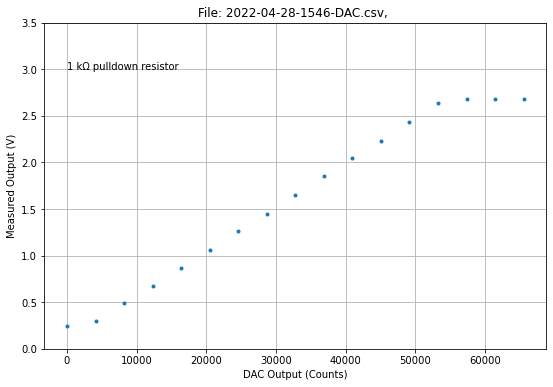

In [6]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(DAC, V, '.')
iD = dataFile.find("2022")
ax.set_title(f"File: {dataFile[iD:]}, {boardID}")
ax.grid()
ax.set_xlabel("DAC Output (Counts)")
ax.set_ylabel("Measured Output (V)")
ax.set_ylim(0, 3.5)
ax.text(0, 3.0, comment)
iPlot = 0
fig.savefig(plotFileFmt % iPlot)
iPlot += 1
